# Unlocking Societal Trends in Aadhaar Demographic Updates

Objective: 
To analyse age-based and regional patterns in Aadhaar demographic updates and derive actionable insights for UIDAI.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import glob
import pandas as pd

files = glob.glob(r"P:\aadhaar_demographic_analysis\api_data_aadhar_demographic_*.csv")

print("Number of files found:", len(files))
files



Number of files found: 5


['P:\\aadhaar_demographic_analysis\\api_data_aadhar_demographic_0_500000.csv',
 'P:\\aadhaar_demographic_analysis\\api_data_aadhar_demographic_1000000_1500000.csv',
 'P:\\aadhaar_demographic_analysis\\api_data_aadhar_demographic_1500000_2000000.csv',
 'P:\\aadhaar_demographic_analysis\\api_data_aadhar_demographic_2000000_2071700.csv',
 'P:\\aadhaar_demographic_analysis\\api_data_aadhar_demographic_500000_1000000.csv']

In [4]:
df = pd.concat(
    [pd.read_csv(f) for f in files],
    ignore_index=True
)

df.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [6]:
df = df.dropna(subset=['state', 'district'])
df = df[df['pincode'] != 0]


In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [8]:
df = df.dropna(subset=['date'])


In [9]:
df['month'] = df['date'].dt.to_period('M')
df.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_,month
0,2025-01-03,Uttar Pradesh,Gorakhpur,273213,49,529,2025-01
1,2025-01-03,Andhra Pradesh,Chittoor,517132,22,375,2025-01
2,2025-01-03,Gujarat,Rajkot,360006,65,765,2025-01
3,2025-01-03,Andhra Pradesh,Srikakulam,532484,24,314,2025-01
4,2025-01-03,Rajasthan,Udaipur,313801,45,785,2025-01


In [10]:
total_updates = df[['demo_age_5_17', 'demo_age_17_']].sum()
total_updates


demo_age_5_17     3282163
demo_age_17_     29189596
dtype: int64

### Univariate Analysis: Total Demographic Updates by Age Group

The analysis shows that demographic updates for the 18+ age group are significantly higher than those for the 5 to 17 age group. This indicates that adult citizens undergo more frequent demographic changes, reflecting higher mobility and lifecycle transitions.


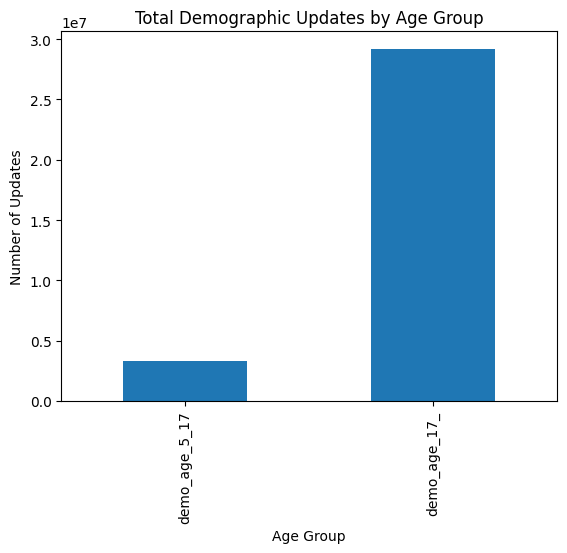

In [11]:
total_updates.plot(kind='bar', title='Total Demographic Updates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Updates')
plt.savefig("state_time_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()


In [12]:
state_age = df.groupby('state')[['demo_age_5_17', 'demo_age_17_']].sum()
state_age.head()


,demo_age_5_17,demo_age_17_
state,,
Andaman & Nicobar Islands,4,542
Andaman and Nicobar Islands,374,3569
Andhra Pradesh,208653,1341411
Arunachal Pradesh,3368,18568
Assam,51953,531083


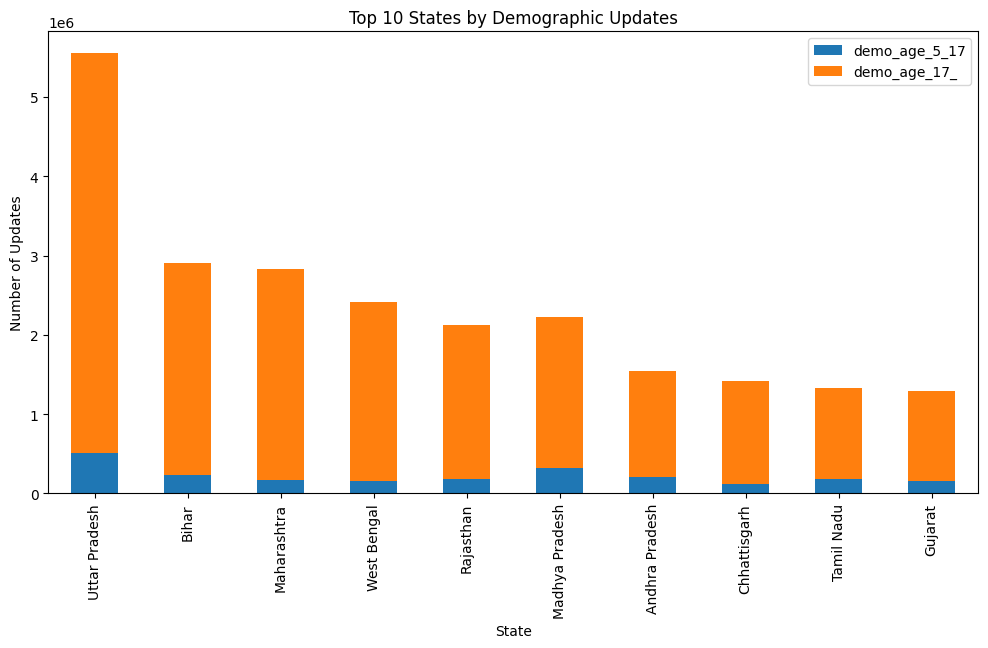

In [13]:
state_age.sort_values('demo_age_17_', ascending=False).head(10).plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

plt.title('Top 10 States by Demographic Updates')
plt.xlabel('State')
plt.ylabel('Number of Updates')
plt.savefig("state_time_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()


### Bivariate Analysis: State-wise Demographic Updates

The analysis reveals that states with higher economic activity and urban concentration record a greater number of adult demographic updates. This suggests stronger population mobility and increased demand for Aadhaar update services in these regions.


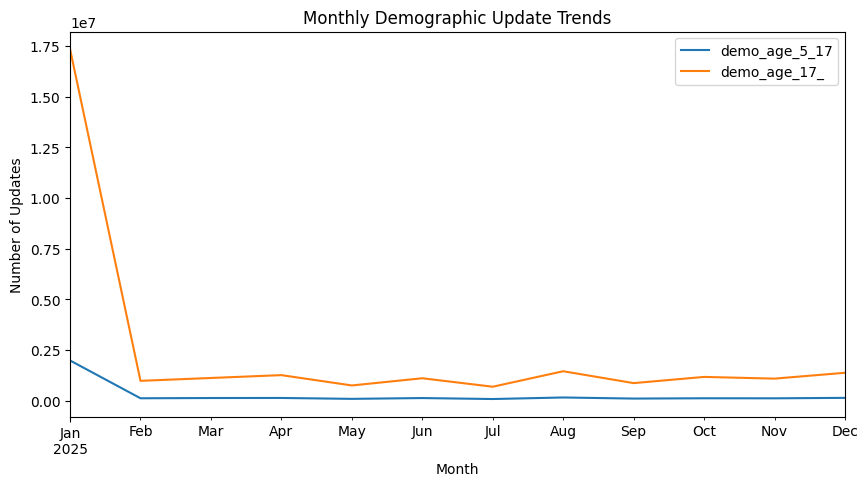

In [14]:
time_age = df.groupby('month')[['demo_age_5_17', 'demo_age_17_']].sum()
time_age.plot(figsize=(10,5))
plt.title('Monthly Demographic Update Trends')
plt.xlabel('Month')
plt.ylabel('Number of Updates')
plt.savefig("state_time_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()


### Temporal Analysis of Demographic Updates

Adult demographic updates exhibit higher variability over time compared to youth updates. This suggests that adult update behavior is more sensitive to socio-economic and mobility-related factors.


In [15]:
tri_state_time = (
    df.groupby(['month', 'state'])['demo_age_17_']
      .sum()
      .reset_index()
)
tri_state_time.head()


,month,state,demo_age_17_
0,2025-01,Andaman & Nicobar Islands,46
1,2025-01,Andaman and Nicobar Islands,1793
2,2025-01,Andhra Pradesh,875504
3,2025-01,Arunachal Pradesh,7881
4,2025-01,Assam,261444


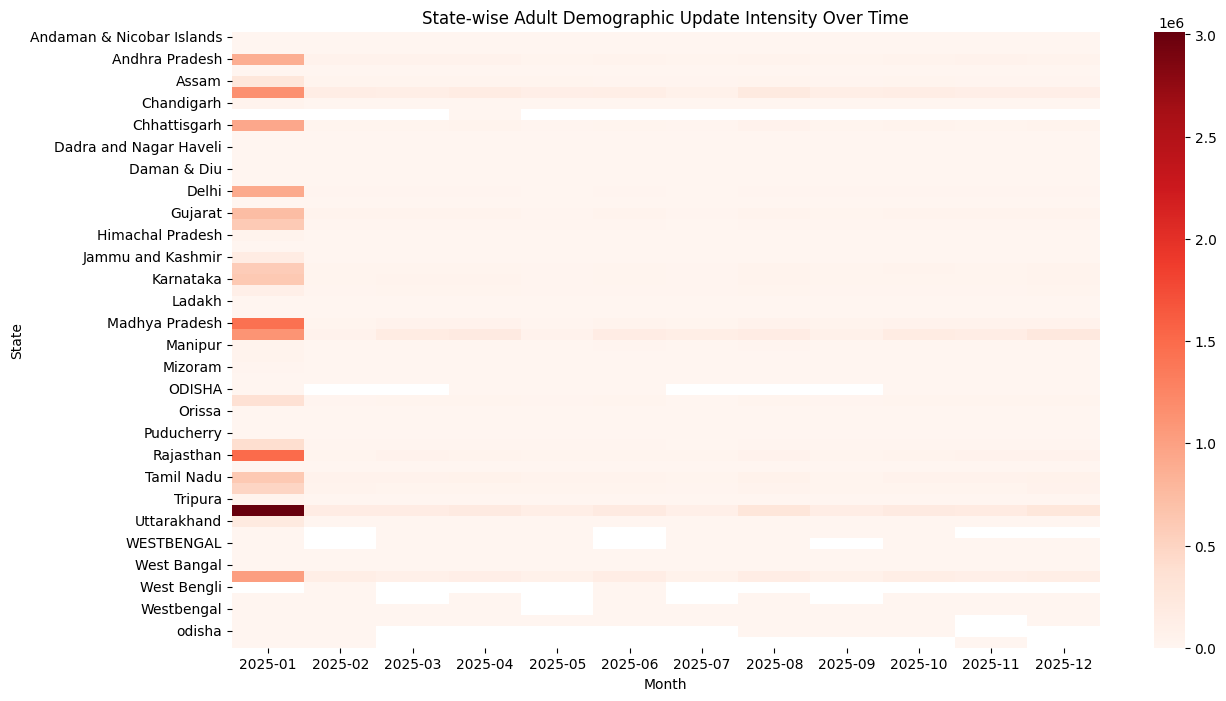

In [16]:
pivot_table = tri_state_time.pivot(
    index='state',
    columns='month',
    values='demo_age_17_'
)

plt.figure(figsize=(14,8))
sns.heatmap(pivot_table, cmap='Reds')
plt.title('State-wise Adult Demographic Update Intensity Over Time')
plt.xlabel('Month')
plt.ylabel('State')
plt.savefig("state_time_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()


### Trivariate Analysis: Time × State × Adult Demographic Updates

The heatmap reveals distinct temporal and regional patterns in adult demographic updates. Certain states show recurring spikes during specific periods, indicating cyclical migration, employment-driven movement, or concentrated administrative update activity. These patterns can help UIDAI anticipate regional demand and allocate update infrastructure proactively.
